# 5.3장 평가 지표와 측정

지금까지 우리는 분류 성능 평가에 정확도(정확하게 분류된 샘플의 비율)를 사용했고, 회귀 성능 평가에는 R^2을 사용했다. 그러나 주어진 데이터셋에 대한 지도 학습 모델의 성능을 재는 방법은 그 외에도 많다. 실전에서 애플리케이션에 따라 이런 평가 지표가 적합하지 않을 수 있으므로, 모델을 선택하고 매개변수를 튜닝할 때 올바른 지표를 선택하는 것이 중요하다.

## 5.3.1 최종 목표를 기억하라

평가 지표를 선택할 때 머신러닝 애플리케이션의 최종 목표를 기억해야 한다. 실제로 정확한 예측을 만드는 것뿐 아니라 큰 의사 결정 프로세스의 일부로 사용하는 데 더 중점을 둬야 할지 모른다. 머신러닝 평가 지표를 선택하기 전에 비즈니스 지표라고 부르는 애플리케이션의 고차원적인 목표를 생각해야 한다. 어떤 머신러닝 애플리케이션에서 특정 알고리즘을 선택하여 나타난 결과를 **비즈니스 임팩트**(business impact)라고 한다. 고차원적인 목표는 교통사고를 피하거나 입원 환자 수를 줄이는 것일지 모른다. 또는 웹사이트에 더 많은 사용자를 유입시키거나 쇼핑몰에서 사용자의 소비를 늘리는 것일 수 있다. 모델을 선택하고 매개변수를 조정할 때, 이런 비즈니스 지표에 긍정적인 영향을 주는 모델과 매개변수를 선택해야 한다. 많은 경우에 특정 모델이 비즈니스에 미치는 영향은 실제 운영 시스템에 적용해야 알 수 있기 때문에 어려운 문제이다.

개발 초기 단계에서 매개변수를 조정하기 위해 시험 삼아 모델을 운영 시스템에 곧바로 적용하기란 비즈니스적으로나 개인적으로나 위험부담이 커서 현실적으로 불가능하다. 자율 주행 자동차의 보행자 회피 기능을 먼저 검증하지 않고 실전에 투입하여 평가한다고 생각해보자. 모델이 나쁘다면 보행자가 위험에 처하게 된다. 그래서 계산하기 쉬운 평가 지표를 이용한 대리 평가 방식을 종종 사용한다. 예를 들면 보행자와 보행자가 아닌 이미지를 분류하는 테스트를 수행해서 정확도를 측정할 수 있다. 이는 대체 방식이므로 평가가 가능하고 원래 비즈니스 목적에 가장 가까운 지표를 찾아야 한다. 이 근사 지표는 모델을 평가할 때나 선택 할 때마다 사용해야 한다. 평가의 결과는 하나의 숫자가 아닐 수 있지만, 선택한 모델의 예상 비즈니스 임팩트를 나타내야 한다. 예를 들어 어떤 알고리즘을 적용하면 고객 수는 10% 늘지만 고객당 매출은 15% 줄어들 수 있다.

이번 절에서는 이진 분류의 특별한 사례에 대한 평가 지표를 먼저 이야기하고, 그다음으로 다중 분류를, 마지막으로 회귀에 대해 진행해보자.

## 5.3.2 이진 분류의 평가 지표

이진 분류는 실전에서 가장 널리 사용하고 개념도 쉬운 머신러닝 알고리즘이다. 하지만 이 간단한 작업을 평가하는 데에도 주의할 점이 많다. 여러 평가 지표를 들여다보기 전에, 정확도를 잘못 측정하는 경우에 대해 살펴보자. 이진 분류에는 양성 클래스와 음성 클래스가 있으면 양성 클래스가 우리의 관심 클래스이다.

### 에러의 종류

잘못 분루한 샘플의 수가 원하는 정보의 전부는 아니므로, 정확도만으로 예측 성능을 측정하기에는 부족할 때가 종종 있다. 자동화 테스트로 암을 조기 발견하는 애플리케이션을 가정해보자. 테스트가 음성이면 건강하다는 뜻이다. 반대로 양성이면 추가 검사를 받아야 한다. 여기서 양성 테스트(암 진단)를 양성 클래스라고 하고 음성 테스트를 음성 클래스라고 한다. 모델이 항상 완벽하게 작동하는 것은 아니니, 잘못 분류할 때가 있다. 어떤 애플리케이션에서든 이런 분류 오류가 실제 현실에서 어떤 결과를 초래하는지 살펴봐야 한다.

예컨대 선ㄱ강한 사람을 양성으로 분류하면 추가 검사를 받게 할 것이다. 이는 환자에게 비용손실과 불편함을 가져다준다. 이와 같은 잘못된 양성 예측을 **거짓 양성**(false positive)이라 한다. 반대로 암에 걸린 사람을 음성으로 분류하여 제대로 된 검사나 치료를 받지 못하게 할 때도 있다. 암을 발견하지 못하면 건강에 심각한 위협을 가하며 치명적일 수 있다. 이런 종류의 잘못된 음성 예측 오류를 **거짓 음성**(false negative)이라 한다. 통계학에서 거짓 양성을 타입 1 에러, 거짓 음성을 타입 2 에러라고도 한다. 여기서는 명확하고 기억하기 쉬운 '거짓 음성', '거짓 양성'을 사용하겠다. 암 진단 예에서는 거짓 음성을 최대한 피해야 하는 반면, 거짓 양성은 비교적 중요도가 낮다.

이 예는 특히 극단적이지만 일반적으로도 거짓 양성의 중요도와 거짓 음성의 중요도가 비슷한 경우는 매우 드물다. 상업적인 애플리케이션에서는 두 오류를 비용으로 환산하여, 예측 오류로 인한 금전적 손해를 측ㄱ정한 값을 정확도 대신 사용하기도 한다. 이런 방식이 어떤 모델을 사용할 지 비즈니스 관점에서 판단하는 데 더 도움될 수 있다.

### 불균형 데이터셋

이 두 종류의 에러(거짓 양성과 거짓 음성)는 두 클래스 중 하나가 다른 것보다 훨씬 많을 때 더 중요하다. 실제로 이는 매우 흔한 상황이며, 좋은 예로는 어떤 아이템이 사용자에게 보여진 노출 데이터로 클릭을 예측하는 것이다. 아이템은 광고일 수도 있고, 관련 기사나 소셜 미디어 사이트에서 팔로우를 위해 추천하는 사람일 수도 있다. 목표는 특정 상품을 보여주면 사용자가 클릭을 할지(즉 관심 대상인지)를 예측하는 것이다. 인터넷에서 볼 수 있는 정보 대부분은 (특히 광고는) 클릭까지 이어지지 않는다. 그래서 사용자가 관심 있는 것을 클릭할 때까지 100개의 광고나 글을 보여줘야 할 수도 있다. 이때 클릭이 아닌 데이터 99개와 클릭 데이터 1개가 데이터셋으로 만들어진다. 다르게 말하면 샘플의 99%가 '클릭 아님' 클래스에 속한다. 이렇게 한 클래스가 다른 것보다 훨씬 많은 데이터셋을 **불균형 데이터셋**(imbalanced datasets) 또는 불균형 클래스의 데이터셋이라 한다. 현실에서 불균형 데이터가 훨씬 많으며, 관심 대상인 이벤트의 빈도가 그렇지 않은 이벤트와 같거나 비슷한 경우는 드물다.

클릭을 99% 정확도로 예측하는 분륙를 만들었다고 해보자. 이는 무슨 뜻일까? 99% 정확도는 괘 높아 보이지만 이는 불균형 클래스를 고려하지 못했다. 굳이 머신러닝 모델을 만들지 않고서도 무조건 '클릭 아님'으로 예측하면 그 정확도는 99%이다. 하지만 불균형 데이터에서도 99% 정확도는 사실 매우 좋은 성능일 수 있다. 그래서 정확도로는 '무조건 클릭 아님' 모델과 '진짜 좋은 모델'을 구분하기 어렵다.

예를 위해서 digirs 데이터셋을 사용해 숫자 9를 다른 숫자와 구분해서 9:1의 불균령한 데이터셋을 만들어보자.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = tts(digits.data, y, random_state=0)

In [2]:
from sklearn.dummy import DummyClassifier
import numpy as np

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 레이블:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블: [False]
테스트 점수: 0.90


거의 아무것도 학습하지 않고 90% 정확도를 얻었다.

누군가 자기 모델의 정확도가 90%라고 말하면 그 사람이 큰일을 해냈다고 생각할 수 있다. 하지만 문제에 따라서는 그저 무조건 한 클래스를 예측하기만 해도 될 수 있다. 실제 분류기를 사용한 것과 비교해보자.

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test,y_test)))

테스트 점수: 0.92


정확도로 보면 DecisionTreeClassifier가 더미 분류기보다 조금 나을 뿐이다. 이는 DecisionTreeClassifier를 잘못 사용했거나 이 문제에서는 정확도가 높은 측정 방법이 아님을 말해준다.

비교를 위해 LogisticRegression과 기본 DummyClassifier 분류기 두 개를 더 살펴보자. DummyClassifier는 무작위로 선택하므로 훈련 세트와 같은 비율의 예측값을 만든다.

In [4]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.80
logreg 점수: 0.98


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


무작위로 예측하는 더미 분류기는 정확오로 봐서는 확실히 결과가 안 좋다. 반면에 LogisticRegression은 매우 좋다. 하지만 더미 분류기조차도 80%를 맞혔다. 이런 결과가 실제로 유용한 것인지 판단하기가 매우 어렵다. 불균형 데이터셋에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니기 때문이다. 이 장의 나머지에서는 모델 선택을 도와주는 다른 평가 지표를 살펴보자. 특히 pred_most_frequent와 pred_dummy처럼, 빈도나 무작위 기반 예측보다 얼마나 더 나은지 알려주는 평가 지표가 필요하다. 모델을 평가하는 지표라면 이런 비상식적인 예측은 피할 수 있어야 한다.

### 오차 행렬

**오차 행렬**(confusion matrix)은 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나이다. 앞 절의 LogisticRegression 예측 결과를 confusion_matrix 함수를 사용해서 확인해보자. 테스트 세트의 예측 결과는 pred_logreg에 저장되어 있다.

In [5]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[401   2]
 [  8  39]]


confusion_matrix의 출력은 2x2 배열이다. 행은 정답 클래스에 해당하고, 열은 예측 클래스에 해당한다. 각 항목의 숫자는 행에 해당하는 클래스(여기에서는 '9 아님'과 '9')가 얼마나 많이 열에 해당하는 클래스로 분류되었는지를 나타낸다.

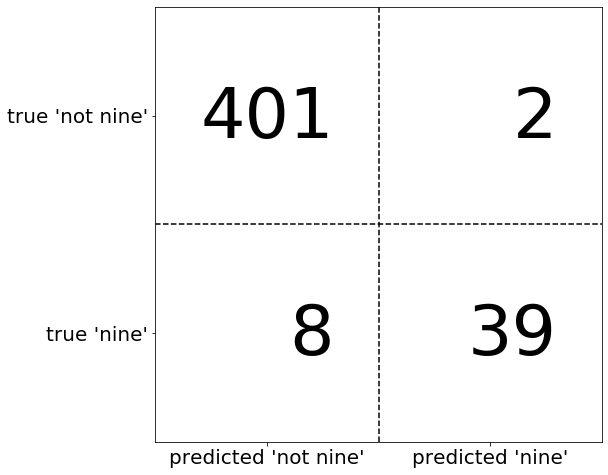

In [7]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

오차 행렬의 대각 행렬은 정확히 분류된 경우이고, 다른 항목은 한 클래스의 샘플들이 다른 클래스로 잘못 분류된 경우가 얼마나 많은지를 알려준다.

숫자 9를 양성 클래스로 정의하면 오차 행렬의 항목은 앞서 이야기한 거짓 양성과 거짓 음성에 연결할 수 있다. 전체 그림을 완성하기 위해 양성 클래스로 올바르게 분류한 샘플을 진짜 양성(True Positive)이라 하고, 음성 클래스로 정확하게 분류한 샘플을 진짜 음성(True Negative)이라 하자. 이들 용어를 축약해서 FP, FN, TP, TN 이라고 쓰며, 오차 행렬에서 다음과 같이 표시한다.

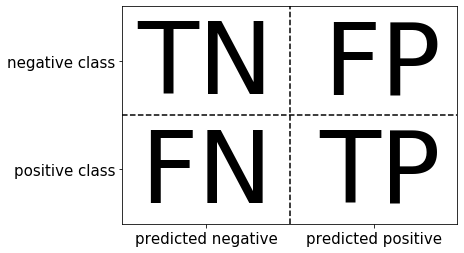

In [8]:
mglearn.plots.plot_binary_confusion_matrix()

이제 이 오차 행렬을 사용하여 앞서 만든 모델들(더미 모델 두 개, 결정 트리, 로지스틱 회귀)을 비교해보자.

In [9]:
print("빈도 기반 더미 모델:\n", confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:\n", confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:\n", confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀:\n", confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
 [[403   0]
 [ 47   0]]

무작위 더미 모델:
 [[364  39]
 [ 45   2]]

결정 트리:
 [[390  13]
 [ 24  23]]

로지스틱 회귀:
 [[401   2]
 [  8  39]]


오차 행렬을 보면 pred_most_frequent에서 뭔가 잘못된 것이 확실하다. 항상 동일한 클래스를 예측하기 때문이다. 반면에 pred_dummy는 특히 거짓 음성(FN)과 거짓 양성(FP)보다 진짜 양성(TP)이 매우 적고, 진짜 양성(TP)보다 거짓 양성(FP)이 매우 많다. 결정 트리의 예측은 더미 분류기보다 정상으로 보이지만, 정확도는 거의 비슷하다. 마지막으로 로지스틱 회귀는 모든 면에서 pred_tree보다 낫다. 진짜 양성(TP)과 진짜 거짓(TN)이 더 많은 반면, 거짓 양성(FP)과 거짓 음성(FN)은 적다. 이렇게 비교하니 결정 트리와 로지스틱 회귀의 결과만 정상이며 로지스틱 회귀가 모든 항목에서 트리 모델보다 잘 작동했다. 그러나 전체 오차 행렬을 조사하기에는 솔직히 조금 번거롭다. 이 행렬의 모든 면을 살펴보면 많은 정보를 얻을 수 있지만, 매우 수동적이며 정성적인 방법이다. 다음 절에서 오차 행렬 정보를 요약할 수 있는 여러 방법을 알아보자.

### 정확도와의 관계

우리는 이미 오차 행렬의 결과를 요약하는 방법을 보았는데, 바로 정확도로 표현하는 것이다.

정확도 = (TP+TN)/(TP+TN+FP+FN)

다른 말로 하면, 정확도는 정확히 예측한 수를 전체 샘플 수로 나눈 것이다.

### 정밀도, 재현율, f-점수

오차 행렬의 결과를 요약하는 여러 방법 중 가장 일반적인 것은 **정밀도**(precision)와 **재현율**(recall)이다. 정밀돈,ㄴ 양성으로 예측된 것(FP+TP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정한다.

정밀도 = TP/(TP+FP)

정밀도는 거짓 양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용한다. 예를 들어 임상 실험을 통해 신약의 치료 효과를 예측하는 모델을 생각해보자. 임상 실험은 비싸기로 유명해서 제약 회사는 단 한 번의 실험으로 신약의 효과를 검증하기를 원한다. 그렇기 때문에 모델이 거짓 양성(FP)을 많이 만들지 않는 것이 중요하다. 다른 말로 하면 높은 정밀도가 필요하다. 정밀도는 **양성 예측도**(PPV)라고도 한다.

한편 재현율은 전체 양성 샘플(TP+FN) 중에서 얼마나 많은 샘플이 양성 클래스(TP)로 분류되는지를 측정한다.

재현율 = TP/(TP+FN)

재현율은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용한다. 즉 거짓 음성(FN)을 피하는 것이 중요할 때이다. 이 장의 앞부분에 나온 암 진단 사례는 이에 해당하는 좋은 예이다. 건강한 사람이 일부 포함되더라도 암에 걸린 사람을 빠짐없이 찾는 것이 중요하다. 재현율은 **민감도**(sensitivity), **적중률**(hit rate), **진짜 양성 비율**(TPR)이라고도 한다.

재현율 최적화와 정밀도 최적화는 상충한다. 모든 샘플을 진짜 음성(TN)이 하나도 없고 두 양성 클래스에 속한다고 예측하면, 거짓 음성(FN)이 없어져 재현율이 완벽해진다. 하지만 모든 샘플을 양성으로 예측하면 거짓 양성(FP)을 많이 만들고, 다라서 정밀도는 매우 낮아진다. 다른 한편으로 데이터 포인트 하나만 양성이고 나머지는 음성이라고 예측한다면 정밀도는 (진짜 그 데이터 포인트가 양성이라면) 완벽하다. 하지만 재현율은 매우 낮아질 것이다.

**NOTE_ :** 정밀도와 재현율 외에도 TP, FP, TN, FN으로 만들 수 있는 분류 측정 방법은 많다. 머신러닝에서는 이진 분류 문제에 정밀도와 재현율을 가장 많이 사용하며, 분야마다 다른 지표를 사용할 수 있다.

정밀도와 재현율이 매우 중요한 측정 방법이지만, 둘 중 하나만으로는 전체 그림을 볼 수 없다. 정밀도와 재현율의 조화 평균인 **f-점수**(f-score) 또는 f-측정(f-measure)은 이 둘을 하나로 요약해준다.

F = 2 x (정밀도 x 재현율) / (정밀도 + 재현율)

특별히 이 공식을 f1-점수라고도 한다. 정밀도와 재현율을 같이 고려하므로 불균형한 이진 분류 데이터셋에서는 정확도보다 더 나은 지표가 될 수 있다. 앞서 계산한 '9와 9 아님' 데이터셋의 예측에 적용해보자. 여기서 숫자 '9'가 양성 클래스('9'는 True, 나머지는 False 레이블을 가진다)이므로 양성 클래스가 소수 클래스이다.

In [10]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.05
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


여기서 두 가지를 주목해야 한다. 하나는 양성 클래스로 예측된 것이 하나도 없어서 빈도 기반 더미 모델이 에러 메시지를 내뱉는다. 또한 무작위 더미 분류기와 트리 분류기 사이에서도 정확도에는 없던 뚜렷한 차이를 볼 수 있다. f1-점수를 사용해 평가하면 예측 성능이 다시 하나의 숫자로 요약된다. 하지만 어떤 모델이 좋은지 직관적으로 판단하는 데는 정확도보다 f1-점수가 낫다. 그러나 f1-점수는 정확도 보다 이해하거나 설명하기 어렵다는 게 단점이다.

classification_report 함수는 정밀도, 재현율, f1-점수 모두를 한 번에 계산해서 깔끔하게 출력해준다.

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification_report 함수는 클래스마다 (여기에서는 True와 False) 한 줄씩 출력을 만들고, 각 클래스가 양성일 때 정밀도, 재현율, f1-점수를 리포트한다. 이전에 소수 클래스인 숫자 '9'를 양성 클래스로 간주했다. 만약 양성 클래스를 '9 아님'으로 바꾼다면 classification_report 출력에서 볼 수 있듯이 most_frequent 모델의 f1-점수가 0.94이다.

더 나아가 모든 샘플을 '9 아님'으로 분류하기 때문에 '9 아님'클래스의 재현율이 1이다. f1-점수 오른쪽의 마지막 열은 각 클래스에 대한 지지도(support)로, 단순히 이 클래스에 있는 진짜 샘플의 수이다.

분류 리포트의 마지막 세 줄은 정밀도, 재현울, f1-점수의 평균을 보여준다. macro avg는 단순히 클래스별 점수의 평균을 계산한 것이다. weighted avg는 클래스의 샘플 수로 가중 평균한 것이다. 두 클래스를 평균한 것이므로 양성 클래스의 개념이 필요하지 않다. 양성 클래스의 정밀도나 재현율 점수만 보는 것에 비해 두 클래스를 평균하면 숫자 하나로 된 의미 있는 지표를 얻을 수 있다. 무작위 더미 분류기와 로지스틱 회귀의 리포트도 확인해보자.

In [12]:
print(classification_report(y_test, pred_dummy, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.89      0.90      0.90       403
           9       0.05      0.04      0.05        47

    accuracy                           0.81       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.80      0.81      0.81       450



In [13]:
print(classification_report(y_test, pred_tree, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [14]:
print(classification_report(y_test, pred_logreg, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



보다시피, 무작위 더미 모델과 가장 좋은 성능의 로지스틱 회귀 모델은 그렇게 확연히 차이나지 않는다. 어떤 클래스를 양성 클래스로 선택하느냐가 이 평가 지표에  큰 영향을 끼친다. 무작위 더미 모델에서 '9'클래스의 f1-점수가 0.15이지만 (로지스틱 회귀는 0.89), '9 아님'클래스는 각각 0.90와 0.99라서 양쪽 모두 수긍할 만한 결과이다. 하지만 모든 숫자를 함께 보면 정확한 판단을 내릴 수 있어 로지수틱 회귀 모델의 우수성을 알 수 있다.

### 불확실성 고려

오차 행렬과 분류 리포트가 예측 결과를 자세히 분석할 수 있도록 도와준다. 하지만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태이다. 2장에서 보았듯이 대부분의 분류기는 예측의 확신을 가늠하기 위한 decision_function이나 predict_proba 메서드를 제공한다. 예측을 만들어내는 것은 decision_function이나 predict_proba 출력의 임계값으로 사용한다.

다음 예는 음성 클래스 데이터 포인트 400개와 양성 클래스 데이터 포인트 50개로 이뤄진 불균형한 이진 분류 문제이다. 이 데이터셋에 커널 SVM을 학습시키고, 훈련 데이터 그래프 오른쪽에 결정 함수 값을 히트맵으로 나타냈다. 중앙 윗부분에 있는 검은 원은 decision_function이 정확히 0일 때의 임계점을 나타낸다. 이 원 안의 포인트는 양성 클래스로 분류되며 바깥쪽 포인트는 음성 클래스로 분류된다.

In [15]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400,50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = tts(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

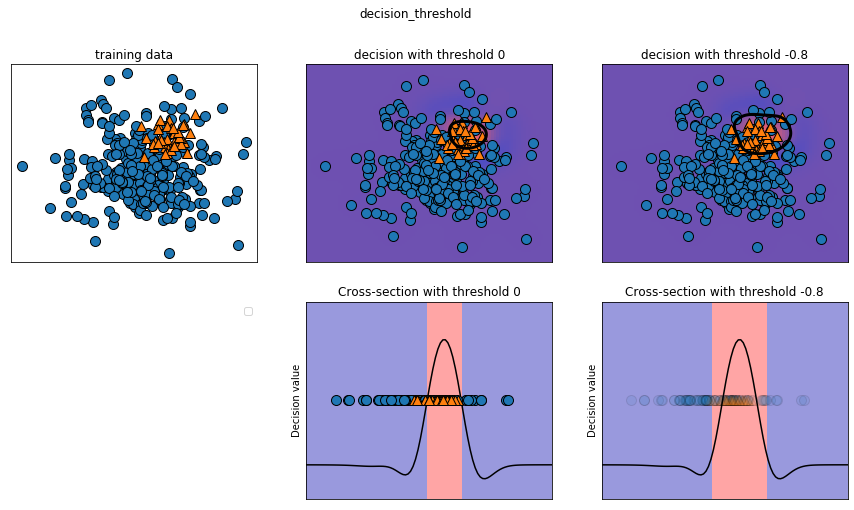

In [16]:
mglearn.plots.plot_decision_threshold()

In [17]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



클래스 1에 대해 상당히 작은 정밀도를 얻었으며 재현율은 절반 정도이다. 클래스 0의 샘플이 매우 많으므로 분류기는 소수인 클래스 1보다 클래스 0에 초점을 맞추고 있다.

이 애플리케이션이 앞의 암 진단 예와 같이 클래스 1의 재현율을 높이는 게 중요하다고 가정해보자. 이 말은 (클래스 1로 잘못 분류된) 거짓 양성(FP)이 늘어나더라도 (재현율을 높이기 위해) 진짜 양성(TP)을 늘리려 한다는 뜻이다. svc.predict로 만든 예측은 이 조건을 충족하지 못하지만, 임계값을 바꿔 클래스 1의 재현율을 높이도록 예측을 조정할 수 있다. 기본적으로 decision_function의 값이 0보다 큰 포인트는 클래스 1로 분류된다. 더 많은 포인트가 클래스 1로 분류되려면 임계값을 낮춰야 한다. 

In [23]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [24]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1004
           1       0.56      0.86      0.68       121

    accuracy                           0.91      1125
   macro avg       0.77      0.89      0.81      1125
weighted avg       0.94      0.91      0.92      1125



기대한 대로 클래스 1의 재현율이 높아졌고 정밀도는 낮아졌다. 이제 더 넓은 영역이 클래스 1로 분류되는 것을 위의 그림의 오른쪽 위 그래프에서 볼 수 있다. 재현율보다 정밀도가 중요하거나 그 반대, 또는 데이터가 심하게 불균형일 때 결정 함수의 임계값을 바꾸면 더 나은 결과를 쉽게 얻을 수 있다. decision_function은 임의의 범위를 가지고 있으므로 임계점을 고르는 일반적인 방법을 제시하기는 어렵다. 임계값을 선택할 때 테스트 세트를 사용하지 않도록 주의를 기울여야 한다. 다른 하이퍼파라미터와 마찬가지로 임계값 설정에 테스트 세트를 사용하면 과도하게 낙관적인 결과를 만들 가능성이 높다. 대신 검증 세트나 교차 검증을 사용하자.

**CAUTION_** 여기서는 간단한 예제를 위해 테스트 세트의 결과를 바탕으로 임계값을 선택했다만 실전에서는 테스트 세트를 사용하면 안된다. 다른 매개변수들처럼 테스트 세트에서 결정 임계값을 선택하면 과도하게 낙관적인 결과가 나온다. 대신 검증 세트나 교차 검증을 사용해야 한다.

predict_proba 메서드는 출력이 0에서 1 사이로 고정되니 predict_proba를 제공하는 모델은 임계값을 선택하기가 더 쉽다. 기본값인 0.5를 임계값으로 설정한 모델은 양성 클래스라는 확신이 50% 이상일 때 양성으로 분류한다. 임계값을 높이면 양성 클래스로 분류할 때 더 큰 ㅎ확신이 있어야 한다(음성 클래스는 확신이 덜 필요하다). 임의의 임계값보다는 확률을 사용하는 쪽이 더 직관적이지만, 모든 모델이 쓸모 있는 불확실성을 제공하는 것은 아니다(최대 깊이까지 자란 DecisionTree는 비록 잘못된 것이라도 항상 100% 확신한다). 이는 **보정**(calibration)개념과 관련이 있다. 보정된 모델은 불확실성을 정확하게 측정하는 모델이다.

### 정밀도-재현율 곡선과 ROC 곡선

모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 정밀도와 재현율의 상충 관계를 조정하는 일이다. 예를 들면 양성 샘플의 실수(FN)를 10%보다 작게 하여 90% 이상의 재현율을 원할 수 있다. 이런 결정은 애플리케이션에 따라 다르며 비즈니스 목표에 따라 결정된다. 어떤 목표가 선택되면 (즉, 어떤 클래스에 대한 특정 재현율 또는 정밀고듸 값) 적절한 임계값을 지정할 수 있다. 다시 말해 90% 재현율과 같은 특정 목적을 충족하는 임계값을 설정하는 것은 언제든 가능하다. 어려운 부분은 이 임계값을 유지하면서 적절한 정밀도를 내는 모델을 만드는 일이다. 만약 모든 것을 양성이라고 분류하면 재현율이 100%가 되지만 이런 모델은 쓸모가 없을 것이다.

90% 재현율처럼 분류기의 필요조건을 지정하는 것을 종종 **운영 포인트**(operating point)를 지정한다고 말한다. 운영 포인트를 고정하면 비즈니스 목표를 설정할 때 고객이나 조직 내 다른 그룹에 성능을 보장하는 데 도움이 된다.


새로운 모델을 만들 때는 운영 포인트가 명확하지 않은 경우가 많다. 이런 경우에는 문제를 더 잘 이해하기 위해 모든 임계값을 조사해보거나, 한 번에 정밀도나 재현율의 모든 장단점을 살펴보는 것이 좋다. 이를 위해 **정밀도-재현율 곡선**(precision-recall curve)을 사용한다.

In [25]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))

precision_recall_curve 함수는 가능한 모든 임계값(결정 함수에 나타난 모든 값)에 대해 정밀도와 재현율의 값을 정렬된 리스트로 반환한다. 이 값을 그래프화 시켜보자.

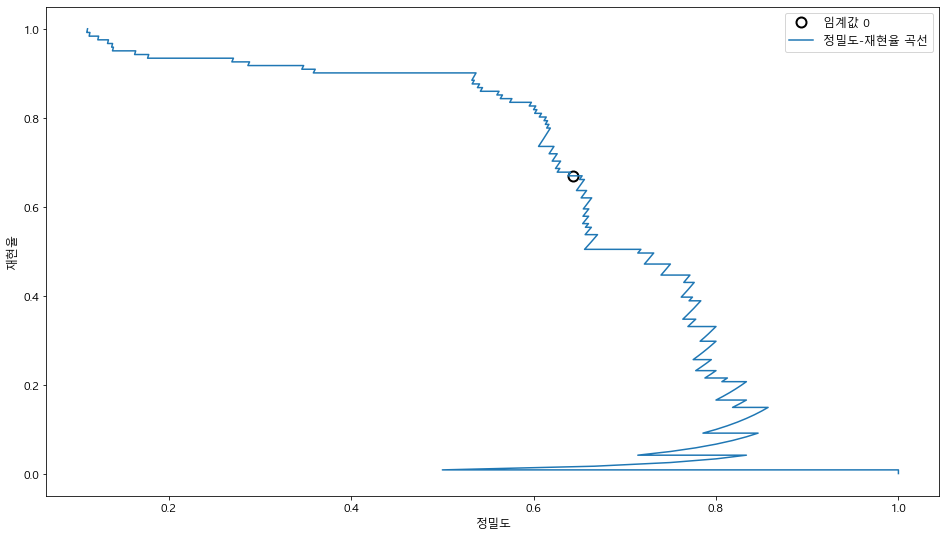

In [26]:
import numpy as np
import matplotlib.pylab as plp
import matplotlib as mpl
#한글 폰트사용
plp.rcParams["font.family"] = "Malgun Gothic"
plp.rcParams["font.size"] = 12
plp.rcParams["figure.figsize"] = (16,9)

#마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

# 부드러운 곡선을 위해 데이터 포인트 수를 늘린다.
X, y = make_blobs(n_samples=(4000,500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = tts(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))
# 0 에 가까운 임계값을 찾는다.
close_zero = np.argmin(np.abs(threshold))

import matplotlib.pyplot as plt

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc='best')

위 그림의곡선의 각 포인트는 decision_function의 가능한 모든 임계값에 대응한다. 이를테면 정밀도가 약 0.75일 때의 재현율은 0.4이다. 검은 원은 decision_function의 기본 임계값은 0 지점을 나타낸다. 이 지점은 predict 메서드를 호출할 때 사용되는 임계값이다. 
    
곡선이 오른쪽 위로 갈수록 더 좋은 분류기이다. 오른쪽 위 지점은 한 임계값에서 정밀도와 재현율이 모두 높은 곳이다. 곡선은 임계값이 매우 낮아 전부 양성 클래스가 되는 왼쪽 위에서 시작한다. 임계값이 커지면서 곡선은 정밀도가 높아지는 쪽으로 이동하지만 재현율은 낮아진다. 임계값을 높일수록 양성으로 분류된 포인트 대부분이 진짜 양성(TP)이 되며, 정밀도가 매우 높아지지만 재현율은 낮아진다. 정밀도가 높아져도 재현율이 높게 유지될수록 더 좋은 모델이다.

이 그래프를 조금 더 살펴보면, 재현율을 높게 유지하면서 대략 0.5 정도의 정밀도를 얻을 수 있다. 더 높은 정밀도를 원한다면 재현율을 크게 손해 봐야 한다. 다른 말로 하면, 이 그래프의 왼쪽은 비교적 평편해서 정밀도가 높아지더라도 재현율이 크게 떨어지지 않는다. 정밀도가 0.5보다 크면 정밀도 증가에 다른 재현율 손실이 커진다.

분류기가 다르면 곡선의 다른 부분에서 장점이 생긴다. 즉 운영 포인트가 달라진다. 같은 데이터셋으로 훈련한 랜덤 포레스트와 SVM을 비교해보자. RandomForestClassifier는 decision_function을 제공하지 않고 predict_proba만 가지고 있다. 정밀도-재현율 곡전 함수는 양성 클래스(클래스 1)의 확신에 대한 측정값을 두 번째 매개변수로 받는다. 그래서 샘플이 클래스 1일 확률, 즉 rf.predict_proba(X_test)[:,1]을 넘겨야 한다. 이진 분류에서 predict_proba의 기본 임계값은 0.5이고 곡선에 이 지점을 표시했다. 

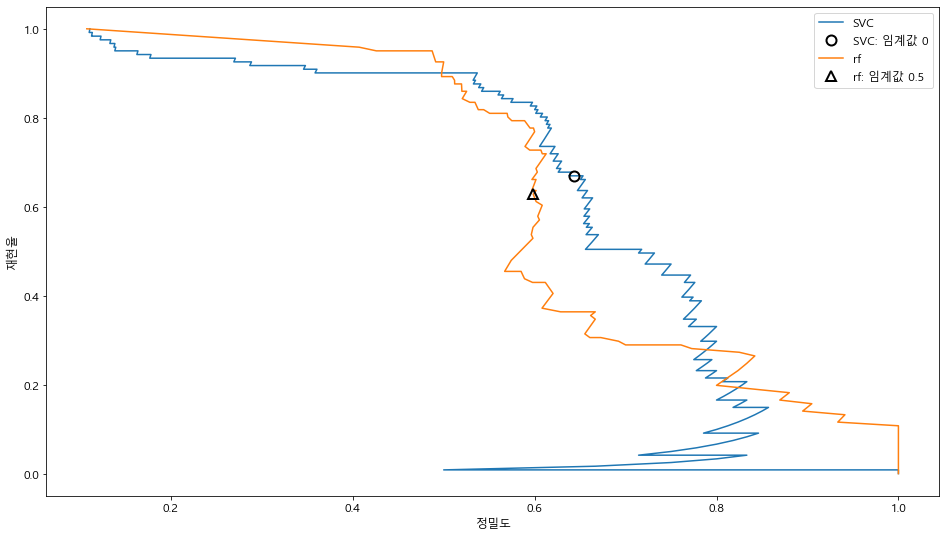

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공한다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(precision, recall, label='SVC')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='SVC: 임계값 0', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, 
         label='rf: 임계값 0.5', fillstyle='none', c='k', mew=2)
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

그래프를 비교해보면 극단적인 부분, 즉 재현율이 매우 높거나 정밀도가 매우 높을 때는 랜덤 포레스트가 더 낫다는 것을 알 수 있다. 가운데 근처(정밀도=0.7 정도)에서는 SVM이 더 좋다. 만약 f1-점수만으로 전체 성능을 비교한다면 이런 세세한 부분을 놓칠 수 있다. f1-점수는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수이다.

In [28]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("SVC의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
SVC의 f1_score: 0.656


두 정밀도-재현율 곡선을 비교하면 많은 통찰을 얻을 수 있지만, 확실히 수작업이다. 모델을 자동으로 비교하려면 특정 임계값이나 운영 포인트에 국한하지 않고 전체 곡선에 담긴 정보를 요약해야 한다. 이러한 요약 방법의 하나로 정밀도-재현율 곡선의 아랫부분 면적을 계산할 수 있으며, 이를 **평균 정밀도**(average precision)라고 한다. average_precision_score 함수가 평균 정밀도를 계산해준다. 정밀도-재현율 곡선을 계산하고 여러 임계값을 고려해야 하므로, predict 함수가 아니라 decision_function이나 predict_proba 함수의 결과값을 average_precision_score 함수로 전달해야 한다.

In [29]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


모든 임계값에 대해 평균을 내보면 랜덤 포레스트가 조금 낮지만, SVC와 거의 같은 성능이다. 이는 앞서 본 f1_score의 결과와는 사뭇 다르다. 평균 정밀도는 0에서 1 사이를 지나는 곡선의 아래 면적이므로 항상 0(가장 나쁨)과 1(가장 좋음) 사이의 값을 반환한다. 무작위로 예측하는 분류기의 decision_function의 평균 정밀도는 데이터셋에 있는 양성 클래스의 비율이 된다.

### ROC와 AUC

**ROC 곡선**은 여러 임계값에서 분류기의 특성을 분석하는 데 널리 사용하는 도구이다. 정밀도-재현율 곡선과 비슷하게 ROC 곡선은 분유기의 모든 임계값을 고려하지만, 정밀도와 재현율 대신 **진짜 양성 비율**(TPR)에 대한 **거짓 양성 비율**(FPR)을 나타낸다. 진짜 양성 비율은 재현율(전체 양성 샘플 중에서 진짜 양성으로 잘 분류한 비율)의 다른 이름이며, 거짓 양성 비율은 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율이다.

FPR = FP/(FP+TN)

ROC 곡선은 roc_curve 함수를 사용하여 만들 수 있다.

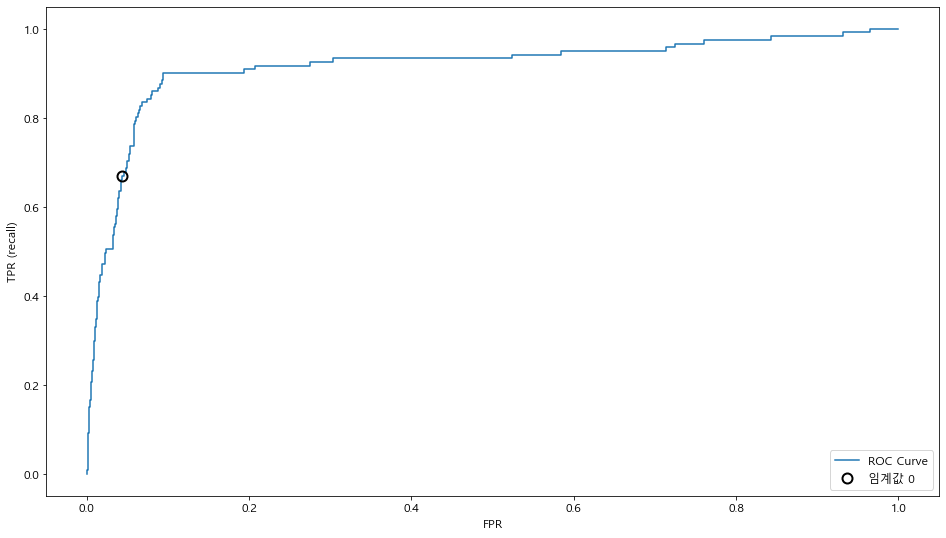

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 0 근처의 임계값을 찾는다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

ROC 곡선은 왼쪽 위에 가까울수록 이상적이다. 거짓 양성 비율(FPR)이 낮게 유지되면서 재현율(TPR)이 높은 분류기가 좋은 것이다. 기본 임계값 0의 지점과 비교했을 때, FPR을 조금 늘리면 재현율을 아주 크게 높일 수 있다(0.9 부근). 왼족 위에 가장 가까운 지점이 기본값으로 찾은 것보다 더 좋은 운영 포인트이다. 여기서도 마찬가지로 임계값을 고르기 위해 테스트 세트를 사용해서는 안 되고 별도의 검증 세트를 활용해야 하나.

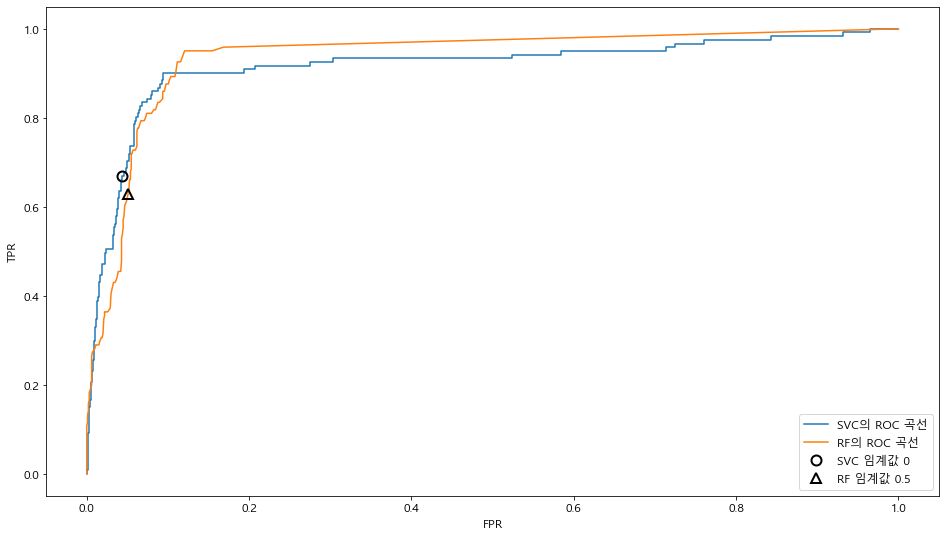

In [31]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='SVC의 ROC 곡선')
plt.plot(fpr_rf, tpr_rf, label='RF의 ROC 곡선')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label="SVC 임계값 0", fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
        label="RF 임계값 0.5", fillstyle='none', c='k', mew=2)

plt.legend(loc=4)

정밀도-재현율 곡선에서 처럼 곡선 아래의 면적값 하나로 ROC곡선을 요약할 때가 많다(이 면적을 보통 **AUC** : area under the curve 라고 하며 여기서 곡선은 ROC 곡선을 말한다). ROC 곡선 아래 면적은 roc_auc_score 함수로 계산한다.

In [32]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("RF의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

RF의 AUC: 0.937
SVC의 AUC: 0.916


AUC 점수로 랜덤 포에스트와 SVM을 비교해보니, 랜덤 포레스트의 성능이 SVM보다 조금 더 낫다. AUC가 0과 1 사이의 곡선 아래 면적이므로 항상 0(최악)과 1(최선) 사이의 값을 가진다. 데이터셋에 담신 클래스가 아무리 불균형하더라도 무작위로 예측한 AUC 값은 0.5가 된다. 그래서 불균형한 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표이다. AUC는 양성 샘플의 순위를 평가하는 것으로 볼 수 있다. 이는 분류기에서 무작위로 선택한 양성 클래스 포인트의 점수가 무작위로 선택한 음성 클래스 포인트의 점수보다 높을 확률과 같다. 그래서 AUC가 1일 때는 모든 양성 포인트의 점수가 모든 음성 포인트의 점수보다 높다. 불균형한 클래스를 분류하는 문제에서 모델을 선택할 때는 정확도보다 AUC가 훨씬 의미 있는 정보를 제공한다.

앞서 본 digits 데이터셋에서 9와 다른 숫자를 구분하는 문제를 다시 보자. 커널 폭 gamma를 각기 다르게 한 SVM을 이 데이터셋에 적용해보자.

gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


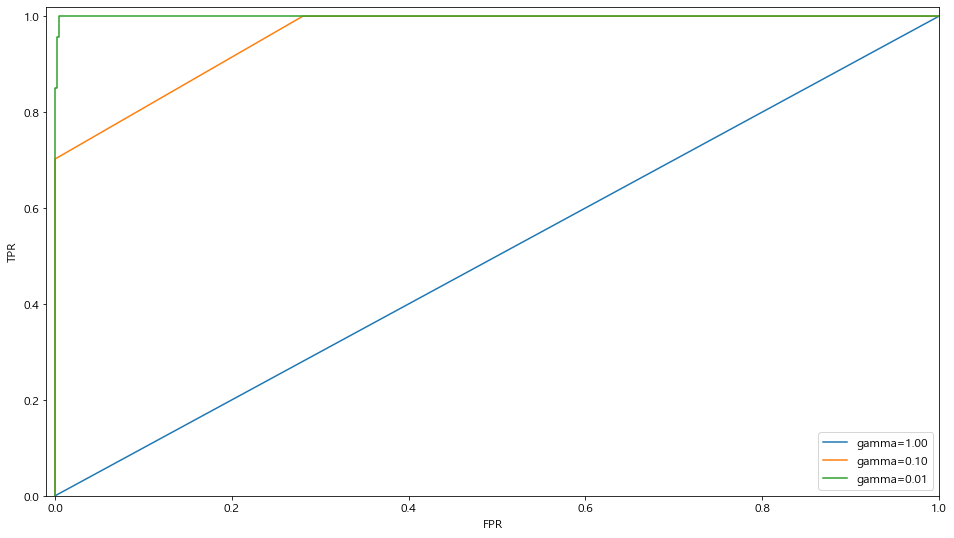

In [33]:
y = digits.target==9

X_train, X_test, y_train, y_test = tts(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01,1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

세 가지 gamma 값에 대한 정확도는 90%로 모두 같다. 이는 우연히 성능이 같은 것일 수도 있고 아닐 수도 있다. 그러나 AUC와 ROC 곡선을 보면 세 모델의 차이가 뚜렷하게 확인된다. gamma=1.0에서 AUC는 무작위로 선택한 수준, 즉 decision_function의 출력이 무작위 선택과 다를 바다 없다. gamma=0.1에서는 AUC 값이 0.96으로 크게 향상되었다. 마지막으로 gamma=0.01에서 완벽한 AUC 값인 1을 얻었다. 즉 결정 함수에 의해서 모든 양성 포인트는 어떤 음성 포인트보다 더 높은 점수를 가진다. 다르게 말하면 적절한 임계값에서 이 모델은 데이터를 완벽하게 분류할 수 있다. 이 사실은 이 모델에서 임계값을 조정해서 아주 높은 예측 성능을 얻을 수 있음을 말해준다. 정확도만 사용한다면 이런 점을 결코 발견하지 못할 것이다.

이런 이유로 불균형한 데이터셋에서 모델을 평가할 때는 AUC를 사용하라고 강력이 권한다. 하지만 AUC 값이 기본 임계값과는 상관없으므로, AUC가 높은 모델에서 좋은 분류 결과를 얻으려면 결정 임계값을 조정해야 한다.

## 5.3.3 다중 분류의 평가 지표

이진 분류 평가에 대해 자세리 보았으니, 이제 다중 분류를 평가하는 지표를 알아보자. 기본적으로 다중 분류를 위한 지표는 모두 이진 분류 평가 지표에서 유도되었으며, 다만 모든 클래스에 대해 평균을 낸 것이다. 다중 분류의 정확도도 정확히 분류된 샘플의 비율로 정의한다. 그래서 클래스가 불균형할 때는 정확도는 좋은 평가 방법이 되지 못한다. 85% 포인트가 클래스 A에 속하고, 10%는 클래스 B, 5%는 클래스 C에 속한 삼중 클래스 분류 문제를 생각해보자. 이 데이터셋에서 정확도가 85%라는 것은 어떤 의미일까? 일반적으로 다중 분류의 결과는 이진 분류 결과보다 이해하기 어렵다. 다중 분류의 평가에는 정확도 외에 앞 절의 이진 분류에서 사용한 오차 행렬과 분류 리포트 등을 일반적으로 사용한다. 이 두 평가 방법을 digits 데이터셋의 10개 손글씨 숫자를 분류하는 데 적용해보자.

In [34]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = tts(digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도 : {:.3f}".format(accuracy_score(y_test,pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도 : 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


이 모델의 정확도는 95.3%로 꽤 좋은 성능을 낸다. 오차 행렬에는 더 자세한 내용이 담겨 있다. 이진 분류에서처럼 각 행은 정답 레이블에 해당하며, 열은 예측 레이블에 해당한다.

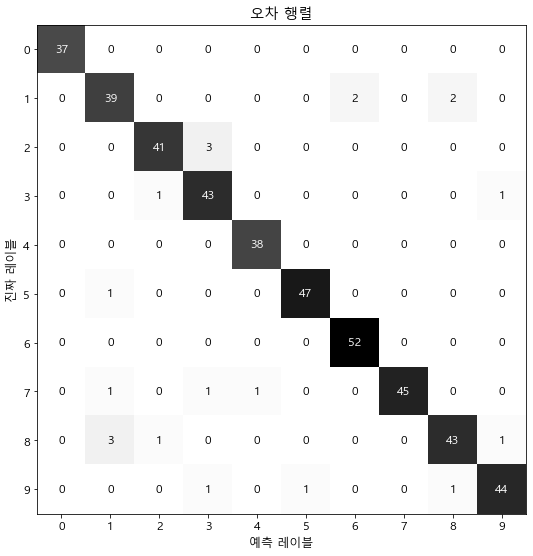

In [35]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names, 
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("오차 행렬")
plt.gca().invert_yaxis()

첫 번째 클래스인 숫자 0은 샘플이 총 37개이며, 모두 클래스 0으로 분류했다(클래스 0에는 거짓 음성(FN)이 없다). 왜냐하면 오차 행렬의 첫 번째 행에서 다른 항목들이 모두 0이기 때문이다. 또한 오차 행렬의 첫 번째 열의 다른 항목들이 모두 0이므로(클래스 0에는 거짓 양성(FP)이 없으므로), 클래스 0으로 잘못 분류한 숫자가 하나도 없다. 하지만 어떤 숫자들은 잘못 분류한 것도 있다. 예를 들면, 숫자 2(세 번째 행) 중 세 개를 숫자 3(네 번째 열)으로 분류했다. 그리고 숫자 3 하나를 2로 분류했고, 숫자 8 세 개를 1로 분류했다.

classification_report 함수를 사용해서 정밀도, 재현율, f1-점수를 계산해보자.

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



당연하지만 숫자 0에는 오차가 없으므로 클래스 0의 정밀도와 재현율은 모두 1로 완벽하다. 한편 클래스 7은 다른 클래스가 7로 잘못 분류한 것이 없어서 정밀도가 1이고, 클래스 6은 거짓 음성(FN)이 없어서 재현율이 1이다. 이 모델은 클래스 1, 3, 8을 분류하는 데 어려움을 겪고 있다. 

다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표는 f1-점수의 다중 분류 버전이다. 다중 클래스용 f1-점수는 한 클래스를 양성 클래스로 두고 나머지 클래스들을 음성 클래스로 간주하여 클래스마다 f1-점수를 계산한다. 그런 다음, 클래스별 f1-점수를 다음 전략 중 하나를 사용하여 평균을 낸다.

1) 'macro' 평균은 클래스별 f1-점수에 가중치를 주지 않는다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룬다.

2) 'weighted' 평균은 클래스별 샘플 수로 가중치를 두어 f1-점수의 평균을 계산한다.

3) 'micro' 평균은 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1-점수를 이 수치로 계산한다.

각 샘플을 똑같이 간주한다면 "micro"평균 f1-점수를 추천한다. 각 클래스를 동일한 비중으로 고려한다면 "macro"평균 f1-점수를 추천한다.

In [37]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average='micro')))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average='macro')))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


## 5.3.4 회귀의 평가 지표

회귀 평가는 분류에서와 비슷하게 할 수 있다. 예를 들면, 타깃을 과대 예측한 것 대비 과소 예측한 것을 분석한다. 그러나 대부분의 애플리케이션에서는 회귀 추정기의 score 메서드에서 이용하는 R^2만으로 충분하다. 가끔 평균 제곱 에러나 평균 절댓값 에러를 사용하여 모델을 튜닝할 때 이런 지표를 기반으로 비즈니스 결정을 할 수 있다. 그러나 일반적으로 R^2이 회귀 모델을 평가하는 데 더 나은 지표이다.

## 5.3.5 모델 선택에서 평가 지표 사용하기

많은 평가 방법과 그 방법들을 주어진 타깃값과 모델에 어떻게 적용하는지 자세히 다루었다. 그러나 GridSearchCV나 cross_val_score를 사용하여 모델을 선택할 때, AUC 같은 평가 지표를 사용하고 싶은 경우가 많이 있다. 다행히 scikit-learn에서는 GridSearchCV와 cross_val_score의 scoring 매개변수를 통해 손쉽게 이를 구현할 수 있다. 사용하려는 평가 지표를 문자열로 넘겨주기만 하면 된다. 예를 들어 digits 데이터셋을 가지고 '9와 9아님'을 분류하는 SVM 모델을 평균 정밀도 점수로 평가해보면, 기본값(정확도)에서 평균 정밀도로 바꾸려면 scoring 매개변수에 average_precision이라고 지정하면 된다.

In [41]:
from sklearn.model_selection import cross_val_score
# 분류의 기본 평가 지표는 정확도 이다.
print("기본 평가 지표:", cross_val_score(SVC(gamma='auto'), digits.data, digits.target==9, cv=5))

# scoring'"accuracy"의 결과는 같다.
explicit_accuracy = cross_val_score(SVC(gamma='auto'), digits.data, digits.target==9, cv=5, scoring='accuracy')
print("정확도 지표", explicit_accuracy)

roc_auc = cross_val_score(SVC(gamma='auto'), digits.data, digits.target==9, scoring='roc_auc', cv=5)
print("평균 정밀도 지표:", roc_auc)

기본 평가 지표: [0.9        0.9        0.89972145 0.89972145 0.89972145]
정확도 지표 [0.9        0.9        0.89972145 0.89972145 0.89972145]
평균 정밀도 지표: [0.99674211 0.99725652 0.99552804 0.99836601 0.99165807]


cross_validate 함수를 사용하면 한 번에 여러 측정 지표를 계산할 수 있다.

In [42]:
from sklearn.model_selection import cross_validate
import pandas as pd

res = cross_validate(SVC(gamma='auto'), digits.data, digits.target==9,
                    scoring=['accuracy', 'roc_auc', 'recall_macro'],
                    return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.274263,0.155625,0.900000,1.0,0.996742,1.0,0.5,1.0
1,0.335139,0.154587,0.900000,1.0,0.997257,1.0,0.5,1.0
2,0.247337,0.152592,0.899721,1.0,0.995528,1.0,0.5,1.0
3,0.252323,0.156584,0.899721,1.0,0.998366,1.0,0.5,1.0
4,0.260268,0.165561,0.899721,1.0,0.991658,1.0,0.5,1.0


비슷하게 GridSearchCV 에서 최적의 매개변수를 선택하기 위한 평가 지표를 바꿀 수 있다.

In [44]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = tts(digits.data, digits.target==9, random_state=0)

# 일부러 적절하지 않은 그리드를 만든다.
param_grid = {'gamma':[0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용한다.
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수(정확도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수(정확도): 0.970
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [45]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='average_precision', cv=3)
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수(평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수(평균 정밀도): 0.985
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.996


정확도를 사용할 땐 gamma=0.001이 선택되지만, 평균 정밀도를 사용하면 gamma=0.01이 선택된다. 두 경우 모두 교차 검증 점수가 테스트 세트에 대한 결과와 일치한다. 평균 정밀도를 최적화하기 위해 찾은 매개변수에서는 테스트 세트의 평균 정밀도가 더 높다. 반면 정확도를 최적화 하기 위해 찾은 매개변수에서는 테스트 세트의 정확도가 더 높다.

분류 문제에서 scoring 매개변수의 중요한 옵션은 accuracy(기본값), ROC 곡선의 아래 면적인 roc_auc, 정확도-재현율 곡선의 아래 면적인 average_precision, 이진 f1-점수인 f1과 가중치 방식에 따라 f1_macro, f1_micro, f1_weighted가 있다. 회귀에서 가장 널리 사용하는 것은 R^2점수를 나타내는 r2, 평균 제곱 오차인 mean_squared_error, 평균 절댓값 오차인 mean_absolute_error이다. 공식 문서에서 전체 옵션 목록을 볼 수 있으며(http://goo.gl/C7kSgU) metrics.scorer 모듈의 SCORERS 딕셔너리를 봐도 된다.

In [46]:
from sklearn.metrics.scorer import SCORERS
print("가능한 평가 방식:\n", sorted(SCORERS.keys()))

가능한 평가 방식:
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


# 요약 및 정리

이번 장에서 교차 검증, 그리드 서치, 평가 지표와 머신러닝 알고리즘을 평가하고 개선하기 위한 기초 사항을 살펴보았다. 이 장에서 논의한 도구들과 2, 3장에서 나온 알고리즘들은 모든 머신러닝 개발자의 필수 도구이다.

초보 기술자가 간과하기 쉽기 때문에 이 장에서 나온 주의 사항 두 개를 다시 환기해보자. 첫째, 교차 검증을 해야 한다. 교차 검증 또는 테스트 세트를 사용하면 머신러닝 모델의 미래 성능을 평가할 수 있다. 하지만 테스트 세트나 교차 검증을 모델이나 모델의 매개변수 선택에 사용하면 (테스트 데이터를 써버렸기 때문에) 테스트 데이터로 분리해서 사용해야 한다. 간단하게 한 번만 분리하는 대신 교차 검증으로 분할을 반복한다. (앞에서 언급했듯이) 가장 널리 사용하는 구성은 훈련 세트와 테스트 세트로 분할하고 모델과 모델 매개변수 선택을 위해 훈련 세트에 교차 검증을 적용하는 방식이다.

둘째, 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다. 머신러닝 모델의 예측으로부터 비즈니스 결정을 내리는 이론은 이 책에서 다루지 않는다. 그러나 머신러닝 작업의 최종 목적이 높은 정확도의 모델을 만드는 데서 끝나는 일은 거의 없다. 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야 한다. 실전에서는 분류 문제에 균형 잡힌 클래스를 가진 경우가 거의 없고, 거짓 양성(FP)과 거짓 음성(FN)이 매우 큰 영향을 미친다. 이런 영향을 이해하고 적절한 평가 지표를 선택해야 한다.

지금까지 언급한 모델 평가와 선택 기술은 데이터 과학자의 도구 상자에서 가장 중요한 것들이다. 이 장에서 설명한 그리드 서치와 교차 검증은 지도 학습 모델 하나에만 적용했다. 그러나 우리가 보았듯이 많은 모델이 전처리를 필요로 한다. 3장의 얼굴 인식 예와 같이 어던 애플리케이션에서는 데이터의 표현을 다르게 만드는 것이 도움이 된다. 다음 장에서는 이런 알고리즘을 연결하여 그리드 서치와 교차 검증을 사용할 수 있는 Pipeline 기능을 소개하겠다.